<a href="https://colab.research.google.com/github/annakl97/NGG6050/blob/main/LeonardAnna_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the following data set to investigate the relationship between Age and Wing Length:

Age	| Wing Length
-- | --
3	| 1.4
4	| 1.5
5	| 2.2
6	| 2.4
7	| 3.1
8	| 3.2
9	| 3.2
11	| 3.9
12	| 4.1
14	| 4.7
15	| 4.5
16	| 5.2
17 | 5.0

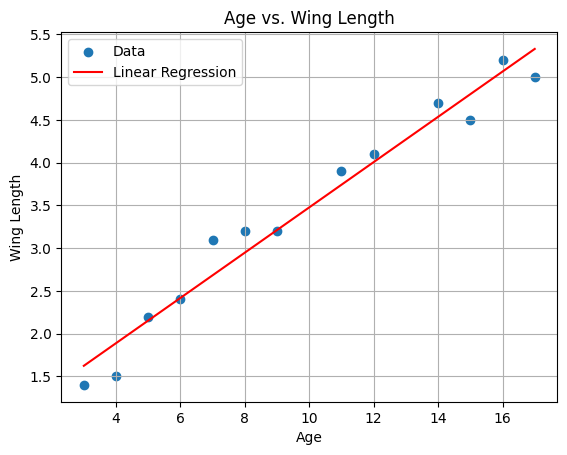

In [1]:
# 1. Plot the relationship between Age and Wing Length
# 2. Calculate and plot the regression line

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Reshape the data to be a 2D array
age = age.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(age, wing_length)

# Make predictions using the model
predicted_wing_length = model.predict(age)

# Plot the data points and the linear regression line
plt.scatter(age, wing_length, label='Data')
plt.plot(age, predicted_wing_length, color='red', label='Linear Regression')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.title('Age vs. Wing Length')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [2]:
# 3. Test the null hypothesis that the slope of the regression (b) = 0

import numpy as np
from scipy import stats

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(age, wing_length)

# Define the null hypothesis: H0: slope (b) is equal to zero
# Alternative hypothesis: Ha: slope (b) is not equal to zero

# Set the significance level (alpha)
alpha = 0.05

# Perform the t-test
if p_value < alpha:
    print(f"Reject the null hypothesis (p-value = {p_value:.4f})")
else:
    print(f"Fail to reject the null hypothesis (p-value = {p_value:.4f})")

# Print the slope and intercept
print(f"Slope (b): {slope:.4f}")
print(f"Intercept (a): {intercept:.4f}")


Reject the null hypothesis (p-value = 0.0000)
Slope (b): 0.2647
Intercept (a): 0.8296


Slope (b): 0.2647
Lower Confidence Interval: 0.2304
Upper Confidence Interval: 0.2989


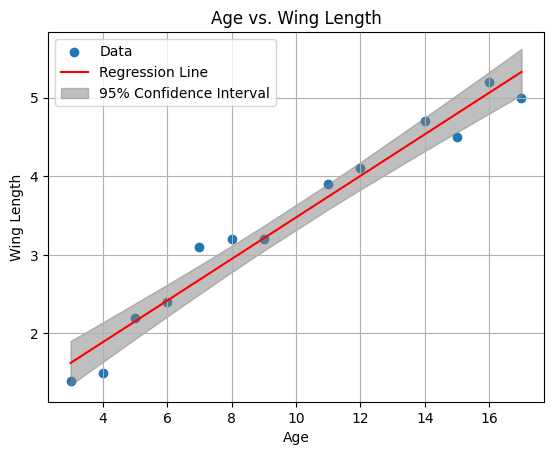

In [3]:
# 4. Calculate and plot the confidence intervals on the slope of the regression.

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Add a constant term to the independent variable (age) for the intercept
X = sm.add_constant(age)

# Fit a linear regression model
model = sm.OLS(wing_length, X).fit()

# Calculate the confidence intervals for the slope
confidence_intervals = model.conf_int(alpha=0.05)  # 95% confidence level

# Extract the slope and its confidence intervals
slope = model.params[1]
lower_ci, upper_ci = confidence_intervals[1]

# Print the results
print(f"Slope (b): {slope:.4f}")
print(f"Lower Confidence Interval: {lower_ci:.4f}")
print(f"Upper Confidence Interval: {upper_ci:.4f}")

# Plot the data points and the regression line
plt.scatter(age, wing_length, label='Data')
plt.plot(age, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.title('Age vs. Wing Length')
plt.legend()
plt.grid(True)

# Plot the confidence intervals
plt.fill_between(age, model.get_prediction(X).conf_int()[:, 0], model.get_prediction(X).conf_int()[:, 1], color='gray', alpha=0.5, label='95% Confidence Interval')

# Show the plot
plt.legend(loc='upper left')
plt.show()


In [4]:
# Calculate r^2

import numpy as np
import statsmodels.api as sm

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Add a constant term to the independent variable (age) for the intercept
X = sm.add_constant(age)

# Fit a linear regression model
model = sm.OLS(wing_length, X).fit()

# Calculate R-squared
r_squared = model.rsquared

# Print the R-squared value
print(f"R-squared (R²): {r_squared:.4f}")


R-squared (R²): 0.9634


In [5]:
# Calculate Pearson's r

import numpy as np
from scipy import stats

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Calculate Pearson's correlation coefficient (r) and p-value
correlation_coefficient, p_value = stats.pearsonr(age, wing_length)

# Print Pearson's correlation coefficient
print(f"Pearson's r: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")


Pearson's r: 0.9815
P-value: 0.0000


Noisy Data:
Slope (b): 0.2179
Lower Confidence Interval: 0.0859
Upper Confidence Interval: 0.3499
R-squared (R²): 0.5453
Pearson's r: 0.7385
P-value: 0.0039


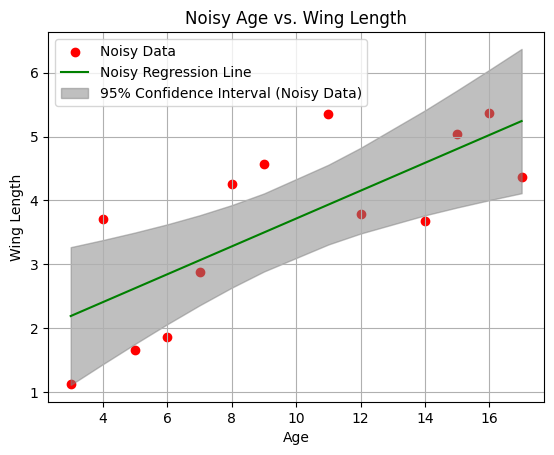

In [10]:
# Add some noise to the data and see how the regression changes

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Original Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length_original = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Introduce Gaussian noise with a specified standard deviation
noise_std_dev = 1  # Adjust this value to control the noise level
noise = np.random.normal(0, noise_std_dev, size=wing_length_original.shape)

# Create the noisy wing length data
wing_length_noisy = wing_length_original + noise

# Calculate and print the linear regression results
X_noisy = sm.add_constant(age)
model_noisy = sm.OLS(wing_length_noisy, X_noisy).fit()
slope_noisy = model_noisy.params[1]
confidence_intervals_noisy = model_noisy.conf_int(alpha=0.05)
lower_ci_noisy, upper_ci_noisy = confidence_intervals_noisy[1]
r_squared_noisy = model_noisy.rsquared

print("Noisy Data:")
print(f"Slope (b): {slope_noisy:.4f}")
print(f"Lower Confidence Interval: {lower_ci_noisy:.4f}")
print(f"Upper Confidence Interval: {upper_ci_noisy:.4f}")
print(f"R-squared (R²): {r_squared_noisy:.4f}")

# Calculate and print Pearson's correlation coefficient
correlation_coefficient_noisy, p_value_noisy = stats.pearsonr(age, wing_length_noisy)
print(f"Pearson's r: {correlation_coefficient_noisy:.4f}")
print(f"P-value: {p_value_noisy:.4f}")

# Plot the noisy data
plt.scatter(age, wing_length_noisy, label='Noisy Data', color='red')
plt.plot(age, model_noisy.predict(X_noisy), color='green', label='Noisy Regression Line')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.title('Noisy Age vs. Wing Length')
plt.legend()
plt.grid(True)

# Plot the confidence intervals for the noisy data
plt.fill_between(age, model_noisy.get_prediction(X_noisy).conf_int()[:, 0], model_noisy.get_prediction(X_noisy).conf_int()[:, 1], color='gray', alpha=0.5, label='95% Confidence Interval (Noisy Data)')

# Show the plot
plt.legend(loc='upper left')
plt.show()
